# <center>PDL Lab10 Tutorial: Multiclass Classification using FMNIST dataset</center>

### 205229103

### Arzoo Sah

### Part-II

In [75]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

# Helper libraries
import numpy as np
import random
import matplotlib.pyplot as plt
import datetime

print(tf.__version__)

2.6.0


In [2]:
#set the seed
from numpy.random import seed
seed(1)

## Load FMNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
#create an array to access the class name based on label number.
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
print(len(train_images),len(test_images))
print(len(train_labels),len(test_labels))

60000 10000
60000 10000


In [24]:
#Check shape of training image
train_images.shape[1:]

(28, 28)

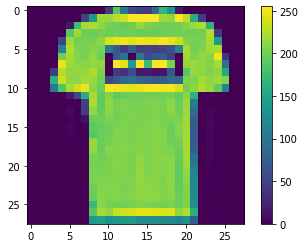

In [9]:
#check the range of pixel values
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

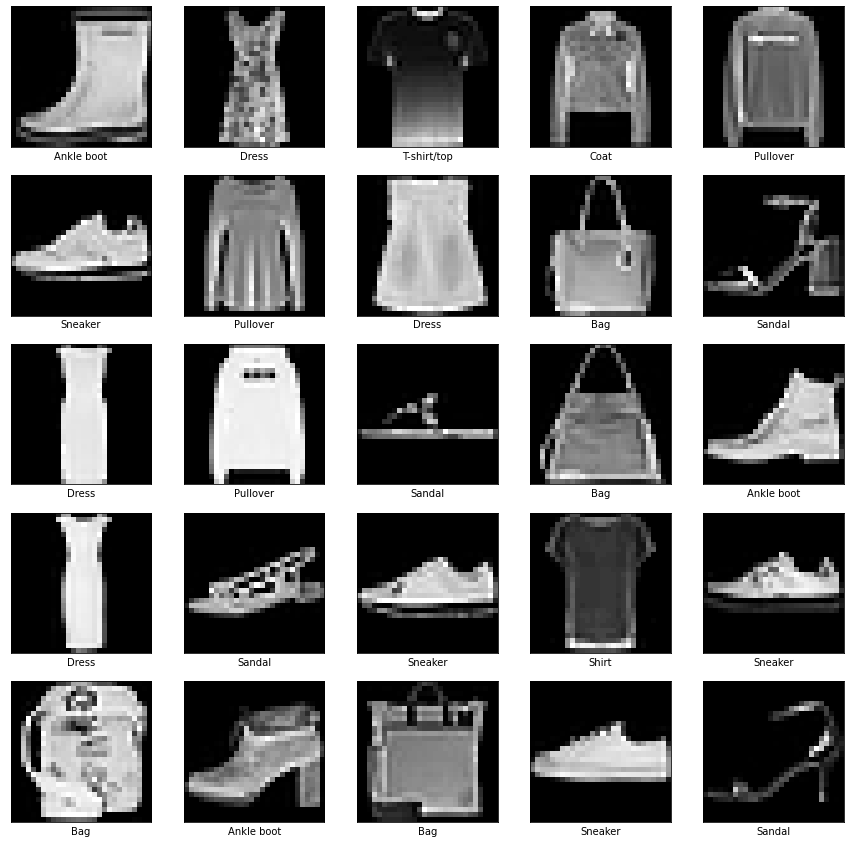

In [10]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    rand_no = random.randint(0,len(train_images))     
    plt.imshow(train_images[rand_no], cmap='gray')
    plt.xlabel(class_names[train_labels[rand_no]])

In [11]:
#Normalizing the pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [12]:
def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))           #input layer size is 784 after flattening
    model.add(Dense(512, activation='relu'))           #hidden layer with 512 neurons
    model.add(Dense(10, activation='softmax'))
    return model

![softmax](https://dphi.tech/blog/wp-content/uploads/2020/08/softmax-1024x551.png)

In [53]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

In [55]:
model.fit(train_images,train_labels, epochs=10, validation_split=0.2,callbacks=[tb_callback])

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4923 - accuracy: 0.8248 - val_loss: 0.4295 - val_accuracy: 0.8431
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3683 - accuracy: 0.8662 - val_loss: 0.3723 - val_accuracy: 0.8658
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3295 - accuracy: 0.8795 - val_loss: 0.3590 - val_accuracy: 0.8690
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3050 - accuracy: 0.8868 - val_loss: 0.3366 - val_accuracy: 0.8797
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2827 - accuracy: 0.8958 - val_loss: 0.3164 - val_accuracy: 0.8862
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2713 - accuracy: 0.8989 - val_loss: 0.3176 - val_accuracy: 0.8882
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2561 - accuracy: 0.9034 - val_loss: 0.3158 - val_accuracy:

In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3596 - accuracy: 0.8767

Test accuracy: 0.8766999840736389


In [58]:
predictions = model.predict(test_images)

In [59]:
predictions.shape

(10000, 10)

In [60]:
class_names[np.argmax(predictions[839])]

'Ankle boot'

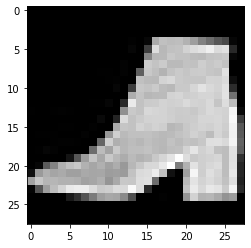

In [61]:
plt.imshow(test_images[839],cmap='gray')

In [45]:
def plot_image(i, predictions_array, true_label, img):
    #true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color=color)

In [44]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

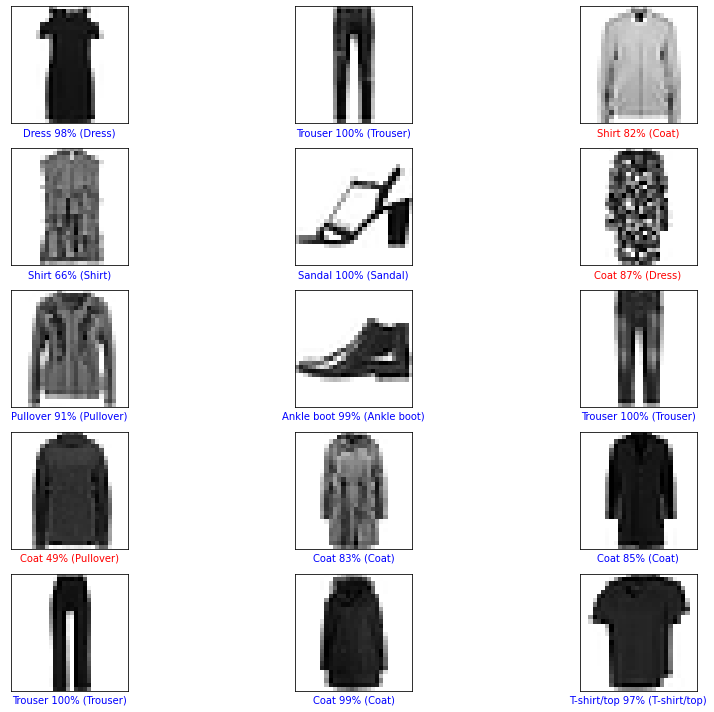

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    i = random.randint(0,len(test_images))     
    plot_image(i,predictions[i],test_labels[i], test_images[i])
plt.tight_layout()
plt.show()

## Exercises

#### Perform atleast 10 modifications and submit a table containing changes made and outputs observed

In [64]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28, 28)))           #input layer size is 784 after flattening

#here , there are 4 hidden layers using 'relu' as activation function 

model1.add(Dense(1028, activation='relu'))    # a layer with 1028 nodes                  
model1.add(Dense(512, activation='relu'))     # a layer with 512 nodes 
model1.add(Dense(256, activation='relu'))     # a layer with 256 nodes
model1.add(Dense(128, activation='relu'))     # a layer with 128 nodes
 
model1.add(Dense(10, activation='softmax'))   #output layer with 10 nodes using 'softmax' as activation function 

In [76]:
#here , optimizer has been changed to RMSprop with 0.001 learning rate 
#RMSprop is an optimizer that’s reliable and fast
#learning rate is scalar used to train a model via gradient descent

model1.compile(optimizer=RMSprop(0.001),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])  

In [77]:
#here , epochs = 15 with validation split 0.2 

model1.fit(train_images,train_labels, epochs=15, validation_split=0.2,verbose=2)

Epoch 1/15
1500/1500 - 24s - loss: 0.1572 - accuracy: 0.9465 - val_loss: 1.1722 - val_accuracy: 0.8901
Epoch 2/15
1500/1500 - 23s - loss: 0.2004 - accuracy: 0.9394 - val_loss: 0.9937 - val_accuracy: 0.8907
Epoch 3/15
1500/1500 - 23s - loss: 0.2138 - accuracy: 0.9343 - val_loss: 1.1447 - val_accuracy: 0.8960
Epoch 4/15
1500/1500 - 23s - loss: 0.2405 - accuracy: 0.9295 - val_loss: 1.1553 - val_accuracy: 0.8940
Epoch 5/15
1500/1500 - 25s - loss: 0.2480 - accuracy: 0.9276 - val_loss: 1.1599 - val_accuracy: 0.8756
Epoch 6/15
1500/1500 - 28s - loss: 0.2531 - accuracy: 0.9249 - val_loss: 1.2272 - val_accuracy: 0.8841
Epoch 7/15
1500/1500 - 26s - loss: 0.2656 - accuracy: 0.9231 - val_loss: 1.2387 - val_accuracy: 0.8904
Epoch 8/15
1500/1500 - 25s - loss: 0.2903 - accuracy: 0.9224 - val_loss: 1.3466 - val_accuracy: 0.8724
Epoch 9/15
1500/1500 - 27s - loss: 0.2916 - accuracy: 0.9189 - val_loss: 1.4350 - val_accuracy: 0.8877
Epoch 10/15
1500/1500 - 25s - loss: 0.2927 - accuracy: 0.9175 - val_loss:

In [78]:
model1.evaluate(test_images,test_labels,verbose=2)

313/313 - 1s - loss: 1.5941 - accuracy: 0.8697


[1.5940947532653809, 0.869700014591217]

#### by using RMSprop as optimizer with 0.001 as learning rate there is slight  increase in loss  and decrease in accuracy     

In [69]:
y_predicted = model1.predict(test_images)
np.argmax(y_predicted[111])

5

In [70]:
class_names[np.argmax(y_predicted[111])]

'Sandal'

In [72]:
test_labels[111]

5